# Import Dependencies

In [1]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import textwrap
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Preproc

In [2]:
data = pd.read_csv("data/data.csv")
data.columns = [x.lower() for x in data.columns]
data.columns = [x.replace(" ", "_") for x in data.columns]
data.head(3)

,coffee_shop,address,hours_on_july_8th,coord
0,Kohiko Coffee House,"4617 Austin Pkwy, Sugar Land, TX 77479",7a-2p,"29.578951892532768, -95.58471209200262"
1,Summer Moon Coffee,"1765 S Friendswood Dr Ste 101, Friendswood, TX...",6a-7p,"29.50729204966772, -95.18599352047224"
2,Simply Coffie,"733 W 24th St, Houston, TX 77008",8a-5p,"29.80803421574694, -95.41174385397547"


In [3]:
data["x"] = data["coord"].apply(lambda x: float(x.split(",")[0]))
data["y"] = data["coord"].apply(lambda x: float(x.split(",")[1]))
data.drop(columns=["coord"], inplace=True)
data.head(3)

,coffee_shop,address,hours_on_july_8th,x,y
0,Kohiko Coffee House,"4617 Austin Pkwy, Sugar Land, TX 77479",7a-2p,29.578952,-95.584712
1,Summer Moon Coffee,"1765 S Friendswood Dr Ste 101, Friendswood, TX...",6a-7p,29.507292,-95.185994
2,Simply Coffie,"733 W 24th St, Houston, TX 77008",8a-5p,29.808034,-95.411744


# Clustering

In [6]:
scaler = StandardScaler()
data[["x_trf", "y_trf"]] = scaler.fit_transform(data[["x", "y"]])
data.head(3)

,coffee_shop,address,hours_on_july_8th,x,y,x_trf,y_trf
0,Kohiko Coffee House,"4617 Austin Pkwy, Sugar Land, TX 77479",7a-2p,29.578952,-95.584712,-1.955995,-1.698732
1,Summer Moon Coffee,"1765 S Friendswood Dr Ste 101, Friendswood, TX...",6a-7p,29.507292,-95.185994,-2.853644,2.395825
2,Simply Coffie,"733 W 24th St, Houston, TX 77008",8a-5p,29.808034,-95.411744,0.913612,0.077529


In [7]:
cluster_engine = KMeans(n_clusters = 6)
cluster_engine.fit(data[["x_trf", "y_trf"]])
data["labels"] = cluster_engine.labels_
data.head(3)

,coffee_shop,address,hours_on_july_8th,x,y,x_trf,y_trf,labels
0,Kohiko Coffee House,"4617 Austin Pkwy, Sugar Land, TX 77479",7a-2p,29.578952,-95.584712,-1.955995,-1.698732,1
1,Summer Moon Coffee,"1765 S Friendswood Dr Ste 101, Friendswood, TX...",6a-7p,29.507292,-95.185994,-2.853644,2.395825,2
2,Simply Coffie,"733 W 24th St, Houston, TX 77008",8a-5p,29.808034,-95.411744,0.913612,0.077529,0


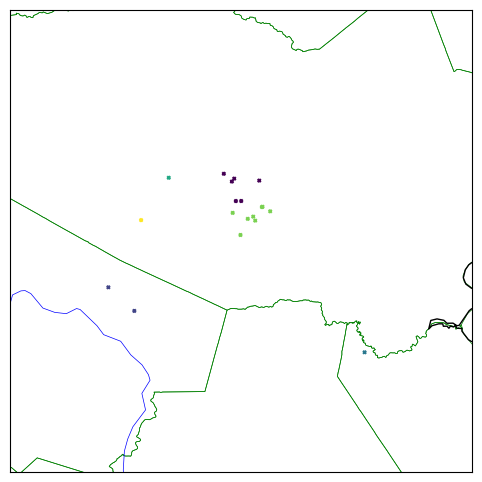

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))
m = Basemap(projection='cyl', resolution='h',
            llcrnrlon=-95.8, llcrnrlat=29.3,
            urcrnrlon=-95, urcrnrlat=30.1, ax=ax)

# m = Basemap(projection='cyl', resolution='h',
#             llcrnrlon=-95.8, llcrnrlat=29.55,
#             urcrnrlon=-95.1, urcrnrlat=29.9, ax=ax)

m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.drawrivers(linewidth=0.5, color='blue')
m.drawcounties(linewidth=0.5, color='green')

x, y = m(data.y, data.x)
# for i, name in enumerate(data.coffee_shop):
#     wrapped_name = wrap_text(name, 10)
#     plt.text(x[i], y[i], wrapped_name, fontsize=8, ha='right')

# Plot points on the map
m.scatter(x, y, marker='x', c = data.labels, zorder=5, s = 5)
plt.show()

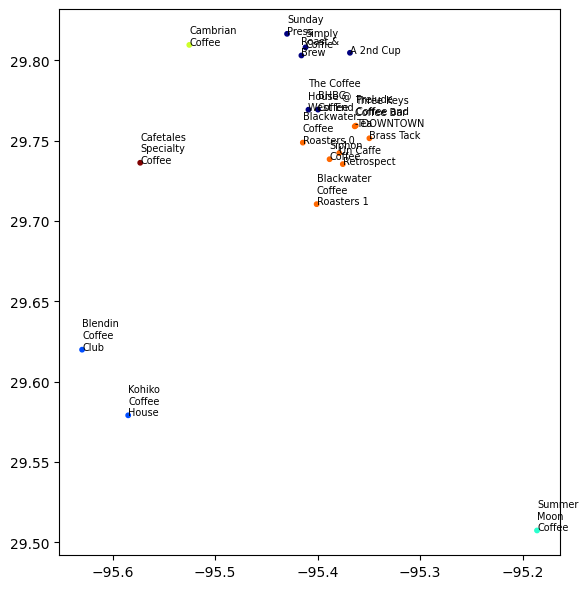

In [9]:
def wrap_text(text, width):
    return '\n'.join(textwrap.wrap(text, width))

plt.figure(figsize = (6,6))
plt.scatter(data.y, data.x, s = 10, c = data.labels, cmap = 'jet')
for i, name in enumerate(data.coffee_shop):
    wrapped_name = wrap_text(name, 10)
    plt.text(data.y[i], data.x[i], wrapped_name, fontsize=7, ha='left')
plt.tight_layout()
plt.show()

In [11]:
data.sort_values(by=["labels"])

,coffee_shop,address,hours_on_july_8th,x,y,x_trf,y_trf,labels
9,A 2nd Cup,"4928 Fulton St Suite A, Houston, TX 77009",7:30a-5p,29.804629,-95.368417,0.870951,0.522464,0
2,Simply Coffie,"733 W 24th St, Houston, TX 77008",8a-5p,29.808034,-95.411744,0.913612,0.077529,0
10,Sunday Press,"Address: 3315 Ella Blvd, Houston, TX 77018",7a-8p,29.816434,-95.429769,1.018827,-0.107580,0
4,BHBG Coffee,"3903 Washington Ave, Houston, TX 77007",8a-10p,29.769263,-95.399630,0.427948,0.201930,0
8,The Coffee House @ West End,"802 Shepherd Dr, Houston, TX 77007",7a-6p,29.769214,-95.408891,0.427323,0.106822,0
7,Roast & Brew,"931 W 19th St, Houston, TX 77008",6:30a-12a,29.802964,-95.415776,0.850102,0.036119,0
16,Blendin Coffee Club,"8410 Hwy 90 Alt Bldg B, Sugar Land, TX 77478",7a-5:30p,29.619821,-95.629671,-1.444048,-2.160426,1
0,Kohiko Coffee House,"4617 Austin Pkwy, Sugar Land, TX 77479",7a-2p,29.578952,-95.584712,-1.955995,-1.698732,1
1,Summer Moon Coffee,"1765 S Friendswood Dr Ste 101, Friendswood, TX...",6a-7p,29.507292,-95.185994,-2.853644,2.395825,2
3,Cambrian Coffee,"9461 Hammerly Blvd E, Houston, TX 77080",7a-3p,29.809532,-95.525114,0.932372,-1.086699,3


# Insights

1. **Are we willing to skip cafetales?** It is not tagged as must visit and it is geospatially isolated from anywhere else
    - ra : on a second thought I kinda wanna stop by this. Pics on insta looked hip.
2. We need to trim down cafes labelled 0 and 4 to make time
3. If we start at Kohiko at 8:30am-ish and move eastward, we will likely to hit lunch around Heigths or downtown areas

### Trim Cafes with Label 0 (Heights/Washington Area)


In [13]:
data[data.labels == 0]

,coffee_shop,address,hours_on_july_8th,x,y,x_trf,y_trf,labels
2,Simply Coffie,"733 W 24th St, Houston, TX 77008",8a-5p,29.808034,-95.411744,0.913612,0.077529,0
4,BHBG Coffee,"3903 Washington Ave, Houston, TX 77007",8a-10p,29.769263,-95.399630,0.427948,0.201930,0
7,Roast & Brew,"931 W 19th St, Houston, TX 77008",6:30a-12a,29.802964,-95.415776,0.850102,0.036119,0
8,The Coffee House @ West End,"802 Shepherd Dr, Houston, TX 77007",7a-6p,29.769214,-95.408891,0.427323,0.106822,0
9,A 2nd Cup,"4928 Fulton St Suite A, Houston, TX 77009",7:30a-5p,29.804629,-95.368417,0.870951,0.522464,0
10,Sunday Press,"Address: 3315 Ella Blvd, Houston, TX 77018",7a-8p,29.816434,-95.429769,1.018827,-0.107580,0


### Trim Cafes with Label 4 (Downtown Area)

In [16]:
data[data.labels == 4]

,coffee_shop,address,hours_on_july_8th,x,y,x_trf,y_trf,labels
5,Un Caffe,"3217 Milam St, Houston, TX 77006",7a-6p,29.742220,-95.378851,0.089186,0.415314,4
6,Siphon Coffee,"701 W Alabama St, Houston, TX 77006",7a-8p,29.738381,-95.388294,0.041099,0.318342,4
11,Brass Tack,"612 Live Oak St, Houston, TX 77003",7a-10p,29.751414,-95.349456,0.204359,0.717186,4
12,Retrospect,"3709 La Branch St, Houston, TX 77004",7a-10p,29.735334,-95.375400,0.002933,0.450754,4
13,Three Keys Coffee Bar - DOWNTOWN,"712 Main St, Houston, TX 77002",7:30a-4p,29.758847,-95.363789,0.297470,0.569994,4
15,Prelude Coffee and Tea,"609 Main St #106, Houston, TX 77002",7a-4p,29.759276,-95.362781,0.302845,0.580342,4
17,Blackwater Coffee Roasters 0,"Street Level, 2229 San Felipe St, Houston, TX ...",7a-3p,29.748714,-95.414397,0.170532,0.050285,4
18,Blackwater Coffee Roasters 1,"6560 Fannin St # 245, Houston, TX 77030",6:30a-4:30p,29.710410,-95.400915,-0.309284,0.188737,4
